# 🧠 Linear Regression Exploration from Scratch
This notebook demonstrates multiple ways to implement Linear Regression:
- OLS (Ordinary Least Squares)
- Batch Gradient Descent
- Stochastic Gradient Descent
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)

We'll also visualize predicted vs actual outputs and study how noise and regularization impact the coefficients.


In [21]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("Housing.csv")

# Select single feature for basic regression
single_feature = data[["area", "price"]]

# Add synthetic noise column
data["noise"] = np.random.normal(loc=0, scale=1, size=len(data))

# Encode binary categorical variable
data["prefarea"] = np.where(data["prefarea"] == "yes", 1, 0)

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,noise
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,1,furnished,0.400038
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,0,furnished,-0.101964
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,1,semi-furnished,0.079656
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,1,furnished,-0.624763
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,0,furnished,-1.000437


## 📌 Linear Regression using Ordinary Least Squares (OLS)
We manually compute slope (b1) and intercept (b0) using the closed-form formula.


In [33]:
def Linear_Regression(X, y):
    X = list(X.values)
    y = list(y.values)
    
    n = len(X)
    mean_x = sum(X) / n
    mean_y = sum(y) / n

    numerator = sum((X[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    denominator = sum((X[i] - mean_x) ** 2 for i in range(n))

    b1 = numerator / denominator
    b0 = mean_y - b1 * mean_x

    print(f"Slope (b1): {b1}, Intercept (b0): {b0}")
    
    # Predict y_hat using the learned model
    y_pred = [b0 + b1 * x for x in X]

    # Evaluate Metrics
    mae = sum(abs(yt - yp) for yt, yp in zip(y, y_pred)) / n

    mse = sum((yt - yp) ** 2 for yt, yp in zip(y, y_pred)) / n

    rmse = mse ** 0.5

    ss_tot = sum((yt - mean_y) ** 2 for yt in y)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y, y_pred))
    r2 = 1 - ss_res / ss_tot

    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    return b0, b1

# Run it
Linear_Regression(single_feature["area"], single_feature["price"])


Slope (b1): 461.9748942727828, Intercept (b0): 2387308.482396433
MAE:  1172305.51
MSE:  2488861398180.66
RMSE: 1577612.56
R²:   0.2873


(2387308.482396433, 461.9748942727828)

## 🔁 Batch Gradient Descent for Linear Regression
We now optimize the regression line using gradient descent with all data points.


In [23]:
def gradient_descent_lr(X, y, lr=0.01, epochs=1000):
    X = (X - X.mean()) / X.std()
    X = list(X.values)
    y = list(y.values)
    
    n = len(X)
    b0 = b1 = 0

    for _ in range(epochs):
        y_pred = [b0 + b1 * x for x in X]
        error = [yp - yt for yp, yt in zip(y_pred, y)]
        grad_b0 = sum(error) / n
        grad_b1 = sum(e * x for e, x in zip(error, X)) / n

        b0 -= lr * grad_b0
        b1 -= lr * grad_b1

    print(f"b0: {b0:.4f}, b1: {b1:.4f}")
    
    return b0, b1

gradient_descent_lr(single_feature["area"], single_feature["price"], lr=0.001, epochs=10000)


b0: 4766513.9186, b1: 1002504.5414


(4766513.918596933, 1002504.5413623946)

## 📈 Visualizing OLS Linear Fit
Let’s draw the regression line over the actual data.


MAE:  1172305.51
MSE:  2488861398180.66
RMSE: 1577612.56
R²:   0.2873


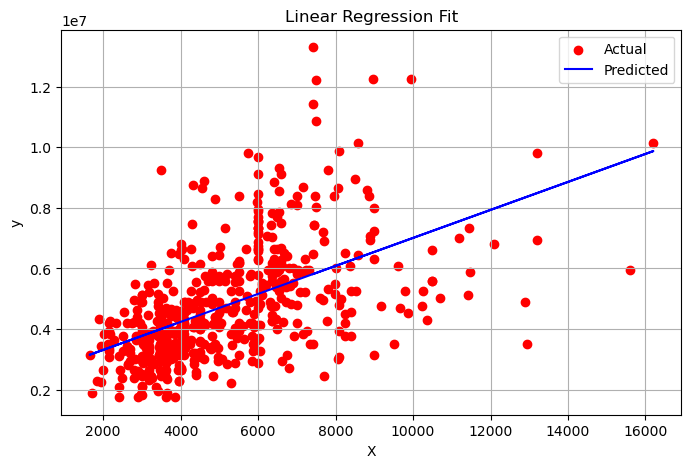

(461.9748942727828, 2387308.482396433)

In [35]:
import matplotlib.pyplot as plt

def LR(X, y):
    mean_X = X.mean()
    mean_y = y.mean()
    n = len(X)
    cov_xy = sum([(x - mean_X) * (y_ - mean_y) for x, y_ in zip(X, y)])
    var_x = np.var(X) * len(X)
    b1 = cov_xy / var_x
    b0 = mean_y - b1 * mean_X

    y_pred = b0 + b1 * X

    # Evaluate Metrics
    mae = sum(abs(yt - yp) for yt, yp in zip(y, y_pred)) / n

    mse = sum((yt - yp) ** 2 for yt, yp in zip(y, y_pred)) / n

    rmse = mse ** 0.5

    ss_tot = sum((yt - mean_y) ** 2 for yt in y)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y, y_pred))
    r2 = 1 - ss_res / ss_tot

    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='red', label='Actual')
    plt.plot(X, y_pred, color='blue', label='Predicted')
    plt.title('Linear Regression Fit')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    return b1, b0

LR(single_feature["area"], single_feature["price"])


## 🔀 Stochastic Gradient Descent (SGD)
We randomly sample a few points in each epoch instead of the whole dataset.


MAE:  1220165.04
MSE:  2624238321230.74
RMSE: 1619950.10
R²:   0.2485


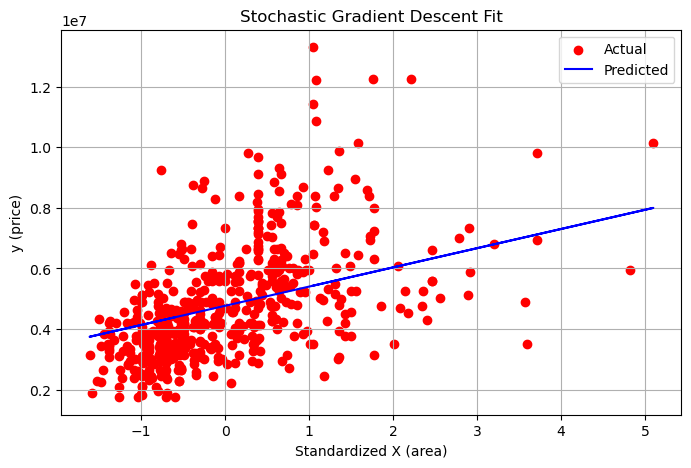

(3262443.1045358456, 292.27512097260876)

In [43]:
import matplotlib.pyplot as plt
import random

def stochastic(X, y, alpha=0.0001, epoch=10000):
    # Convert to arrays
    X = X.values
    y = y.values
    n = len(X)

    # Normalize X and y
    mean_x, std_x = X.mean(), X.std()
    mean_y, std_y = y.mean(), y.std()

    X = [(x - mean_x) / std_x for x in X]
    y = [(yt - mean_y) / std_y for yt in y]

    # Initialize parameters
    b0 = b1 = 0

    # Stochastic Gradient Descent
    for _ in range(epoch):
        batch = [random.randint(0, n - 1) for _ in range(10)]
        X_ = [X[i] for i in batch]
        y_ = [y[i] for i in batch]

        errors = [b0 + b1 * x - y_t for x, y_t in zip(X_, y_)]
        grad_b0 = sum(errors) / len(X_)
        grad_b1 = sum(e * x for e, x in zip(errors, X_)) / len(X_)

        b0 -= alpha * grad_b0
        b1 -= alpha * grad_b1

    # Predict in normalized scale
    y_pred_norm = [b0 + b1 * x for x in X]

    # Convert predictions back to original scale
    y_pred = [mean_y + std_y * yp for yp in y_pred_norm]
    y_actual = [mean_y + std_y * yt for yt in y]  # restoring y for accurate residual plots

    # Evaluation Metrics
    mae = sum(abs(yt - yp) for yt, yp in zip(y_actual, y_pred)) / n
    mse = sum((yt - yp) ** 2 for yt, yp in zip(y_actual, y_pred)) / n
    rmse = mse ** 0.5

    ss_tot = sum((yt - mean_y) ** 2 for yt in y_actual)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_actual, y_pred))
    r2 = 1 - ss_res / ss_tot

    # Print metrics
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    # Plot actual vs predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y_actual, label='Actual', color='red')
    plt.plot(X, y_pred, label='Predicted', color='blue')
    plt.title("Stochastic Gradient Descent Fit")
    plt.xlabel("Standardized X (area)")
    plt.ylabel("y (price)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Return rescaled coefficients
    b1_real = (std_y / std_x) * b1
    b0_real = mean_y + std_y * b0 - b1_real * mean_x

    return b0_real, b1_real

# Run it
stochastic(single_feature["area"], single_feature["price"])


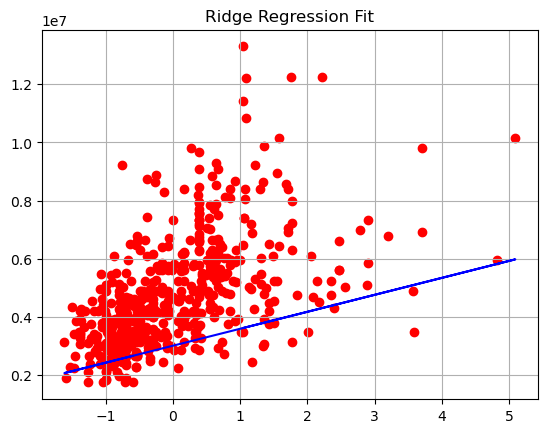

(3013235.2385826875, 583200.7883647443)

In [26]:
def LR_Ridge_grad(X, y, alpha=0.0001, epoch=10000, l=0.1):
    X = (X - X.mean()) / X.std()
    # y = (y - y.mean()) / y.std()
    X = X.values
    y = y.values
    n = len(X)
    
    b0 = b1 = 0

    for _ in range(epoch):
        errors = [b0 + b1 * x - yt for x, yt in zip(X, y)]
        grad_b0 = sum(errors)/n
        grad_b1 = sum(e*x for e, x in zip(errors, X))/n + 2 * l * b1

        b0 -= alpha * grad_b0
        b1 -= alpha * grad_b1

    y_pred = b0 + b1 * X
    plt.scatter(X, y, color='red')
    plt.plot(X, y_pred, color='blue')
    plt.title('Ridge Regression Fit')
    plt.grid(True)
    plt.show()

    return b0, b1

LR_Ridge_grad(single_feature["area"], single_feature["price"], l=0.1)


## 📉 Lasso Regression using Gradient Descent (L1 Regularization)
Here we apply L1 regularization, which can shrink coefficients to 0.


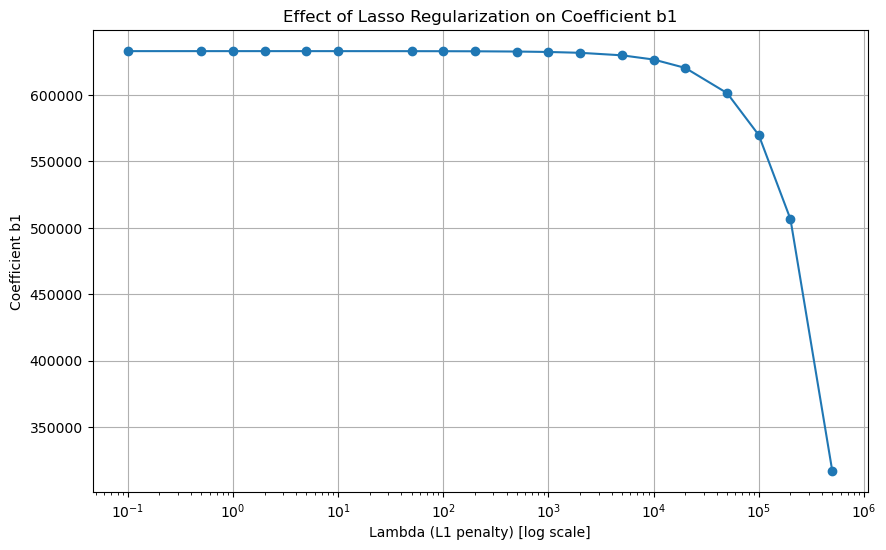

In [32]:
# Modified function to return b1 for each lambda
def LR_Lasso_grad_return_b1(X, y, alpha=0.0001, epoch=10000, l=10):
    X = (X - X.mean()) / X.std()
    X = X.values
    y = y.values
    n = len(X)

    b0 = b1 = 0

    for _ in range(epoch):
        errors = [b0 + b1 * x - yt for x, yt in zip(X, y)]
        grad_b0 = sum(errors) / n
        grad_b1 = sum(e * x for e, x in zip(errors, X)) / n + l * np.sign(b1)

        b0 -= alpha * grad_b0
        b1 -= alpha * grad_b1

    return b1

# Extended lambda values for better graph
lambda_vals = [0.1, 0.5, 1, 2, 5, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]
b1_coeffs = [LR_Lasso_grad_return_b1(single_feature["area"], single_feature["price"], l=lam) for lam in lambda_vals]

# Plotting lambda vs b1
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, b1_coeffs, marker='o')
plt.xscale("log")
plt.xlabel("Lambda (L1 penalty) [log scale]")
plt.ylabel("Coefficient b1")
plt.title("Effect of Lasso Regularization on Coefficient b1")
plt.grid(True)
plt.show()

## 🔁 Multiple Regression with Two Features
Let’s see the effect of an actual feature (`prefarea`) along with a noise variable.


In [28]:
def gradient_descent_lr(x1, x2, y, lr=0.01, epochs=1000):
    x1 = (x1 - x1.mean()) / x1.std()
    x2 = (x2 - x2.mean()) / x2.std()

    x1 = list(x1.values)
    x2 = list(x2.values)
    y = list(y.values)
    n = len(y)

    b0 = b1 = b2 = 0

    for _ in range(epochs):
        y_pred = [b0 + b1 * a + b2 * b for a, b in zip(x1, x2)]
        error = [yp - yt for yp, yt in zip(y_pred, y)]
        grad_b0 = sum(error) / n
        grad_b1 = sum(e * a for e, a in zip(error, x1)) / n
        grad_b2 = sum(e * b for e, b in zip(error, x2)) / n

        b0 -= lr * grad_b0
        b1 -= lr * grad_b1
        b2 -= lr * grad_b2

    return b0, b1, b2

gradient_descent_lr(single_feature["area"], data["prefarea"], single_feature["price"])


(4766523.46205873, 907649.1784017015, 403818.1644329233)

## 🧪 Lasso Regression with Noise Feature
We apply Lasso on both signal and noise to observe if noise coefficients shrink.


In [29]:
def LR_Lasso_grad(x1, x2, y, alpha=0.0001, epoch=10000, l=100000):
    x1 = (x1 - x1.mean()) / x1.std()
    x2 = (x2 - x2.mean()) / x2.std()
    y

    x1, x2, y = x1.values, x2.values, y.values
    n = len(y)

    b0 = b1 = b2 = 0

    print("Correlation (x2 vs y):", np.corrcoef(x2, y))

    for _ in range(epoch):
        y_pred = [b0 + b1 * a + b2 * b for a, b in zip(x1, x2)]
        errors = [yp - yt for yp, yt in zip(y_pred, y)]

        grad_b0 = sum(errors) / n
        grad_b1 = sum(e * a for e, a in zip(errors, x1)) / n
        grad_b2 = sum(e * b for e, b in zip(errors, x2)) / n

        b0 -= alpha * grad_b0
        b1 = np.sign(b1 - alpha * grad_b1) * max(abs(b1 - alpha * grad_b1) - alpha * l, 0)
        b2 = np.sign(b2 - alpha * grad_b2) * max(abs(b2 - alpha * grad_b2) - alpha * l, 0)

    return b0, b1, b2

LR_Lasso_grad(single_feature["area"], data["noise"], single_feature["price"])


Correlation (x2 vs y): [[1.        0.0112706]
 [0.0112706 1.       ]]


(3013235.238582688, 569811.539088446, 0.0)